In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Reading the csv file containing the dataset after cleaning and feature selection.

In [2]:
df = pd.read_csv("books_processed.csv",sep=",",index_col="bookID")

***
**INTRODUCTION**
***
The algorithms 

- LinearRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- Ridge (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

- DecisionTreeRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 

- RandomForestRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


were used to model different set of features from the processed Goodreads dataset:


- [Feature set 1](#1) : **num_pages**, **ratings_count**, **main_author**, **parent_publisher**

- [Feature set 2](#2):  **num_pages**, **ratings_count**, **main_author**

- [Feature set 3](#3):  **num_pages**, **ratings_count**

- [Feature set 4](#4):  **num_pages**, **main_author**

- [Feature set 5](#5):  **ratings_counts**, **main_author**

- [Feature set 6](#6):  **main_author**

- [Feature set 7](#7):  **main_author**, **parent_publisher**


In the [Evaluation](#ev) section, the model predictions will be evaluated using the following metrics:

- MAE (Mean Absolute Error)

- MAPE (Mean Absolute Percentage Error)

- MSE (Mean Squared Error) 

- RMSE (Root Mean Square Error) (the square root of MSE)

- R^2 score 

to understand which of the features and machine learning algorithms provide the best predictions.

*Note:
These algorithms were run several times to check for consistency in results and to determine the most appropriate ratio between train/test datasets. Some tests also included removing some extreme values in number of pages (>1700) and ratings count (>100,000), but this did not provide better results. Therefore, such values were kept.*


***

<a id="1"></a>

# Feature set 1

In [3]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [4]:

df_1 = df[["average_rating","num_pages","ratings_count","main_author","parent_publisher"]]
#Encoding main_author
df_1= pd.concat([df_1,pd.get_dummies(df.main_author)],axis=1)
df_1= df_1.drop(columns=["main_author"])
#Encoding parent_publisher
df_1= pd.concat([df_1,pd.get_dummies(df.parent_publisher)],axis=1)
df_1= df_1.drop(columns=["parent_publisher"])

In [5]:
df_1

,average_rating,num_pages,ratings_count,A.B. Yehoshua,A.D.P. Briggs,A.E. Cunningham,A.J. Jacobs,A.M. Homes,A.N. Roquelaure,A.S. Byatt,...,wo,yndale,Éditions,Эксмо,ガンガンコミックス,小学館,皇冠文化出版有限公司,聯經出版事業股份有限公司,英文漢聲出版股份有限公司,集英社
bookID,,,,,,,,,,,,,,,,,,,,,
1,4.57,652,2095690,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.49,870,2153167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.42,352,6333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.56,435,2339585,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.78,2690,41428,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,512,156,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45633,4.08,635,783,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45634,3.96,415,820,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training and testing split:

In [6]:
df_train, df_test = train_test_split(df_1,test_size = 0.25)

In [7]:
len(df_1)

10222

In [8]:
len(df_train)

7666

In [9]:
len(df_test)

2556

In [10]:
df_1.mean(numeric_only=True)

average_rating        3.944992
num_pages           348.422716
ratings_count     19497.570632
A.B. Yehoshua         0.000196
A.D.P. Briggs         0.000098
                      ...     
小学館                   0.001272
皇冠文化出版有限公司            0.000196
聯經出版事業股份有限公司          0.000196
英文漢聲出版股份有限公司          0.000098
集英社                   0.000783
Length: 5099, dtype: float64

In [11]:
df_train.mean(numeric_only=True)

average_rating        3.943923
num_pages           350.034960
ratings_count     19223.668276
A.B. Yehoshua         0.000261
A.D.P. Briggs         0.000130
                      ...     
小学館                   0.001435
皇冠文化出版有限公司            0.000261
聯經出版事業股份有限公司          0.000261
英文漢聲出版股份有限公司          0.000130
集英社                   0.000913
Length: 5099, dtype: float64

In [12]:
df_test.mean(numeric_only=True)

average_rating        3.948200
num_pages           343.587246
ratings_count     20319.063380
A.B. Yehoshua         0.000000
A.D.P. Briggs         0.000000
                      ...     
小学館                   0.000782
皇冠文化出版有限公司            0.000000
聯經出版事業股份有限公司          0.000000
英文漢聲出版股份有限公司          0.000000
集英社                   0.000391
Length: 5099, dtype: float64

In [13]:
df_train.columns.values

array(['average_rating', 'num_pages', 'ratings_count', ...,
       '聯經出版事業股份有限公司', '英文漢聲出版股份有限公司', '集英社'], dtype=object)

In [14]:
X_train = df_train.loc[:,df_train.columns[1:].values].values
X_train

array([[  654,   278,     0, ...,     0,     0,     0],
       [  112,   169,     0, ...,     0,     0,     0],
       [  413,   543,     0, ...,     0,     0,     0],
       ...,
       [  183,  2728,     0, ...,     0,     0,     0],
       [  154,  3381,     0, ...,     0,     0,     0],
       [  167, 93997,     0, ...,     0,     0,     0]], dtype=int64)

In [15]:
y_train = df_train.average_rating.values
y_train

array([4.22, 4.39, 4.06, ..., 4.28, 3.69, 4.09])

In [16]:
X_test = df_test.loc[:,df_test.columns[1:].values].values
y_test = df_test.average_rating.values

#making a copy of y test
y_test_1 = y_test

## LinearRegression


MAE:
 0.17771299796676357

MAPE:
 0.0458601707595279

MSE:
 0.057201384968577185

RMSE:
 0.2391681102667686

R2:
 0.2126923922765266


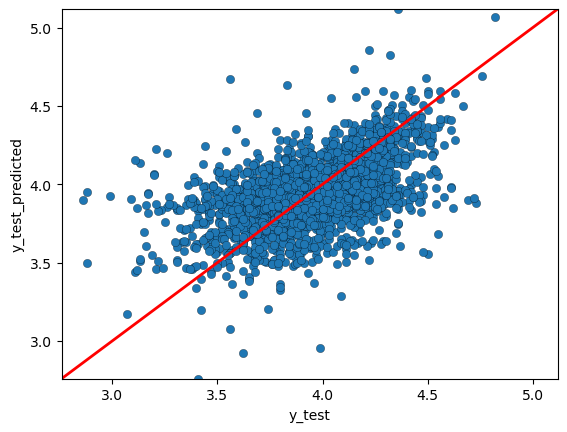

In [17]:
lr_1 = LinearRegression()

lr_1.fit(X=X_train,y=y_train)

y_test_predicted = lr_1.predict(X_test)

# MAE (Mean Absolute Error)
mae_lr_1 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_lr_1 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_lr_1= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_lr_1 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_lr_1 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_lr_1)
print("\nMAPE:\n",mape_lr_1)
print("\nMSE:\n",mse_lr_1)
print("\nRMSE:\n",rmse_lr_1)
print("\nR2:\n",r2_lr_1)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## Ridge


MAE:
 0.16736012312918747

MAPE:
 0.04325558155749456

MSE:
 0.04909586167004973

RMSE:
 0.2215758598540232

R2:
 0.32425507840757295


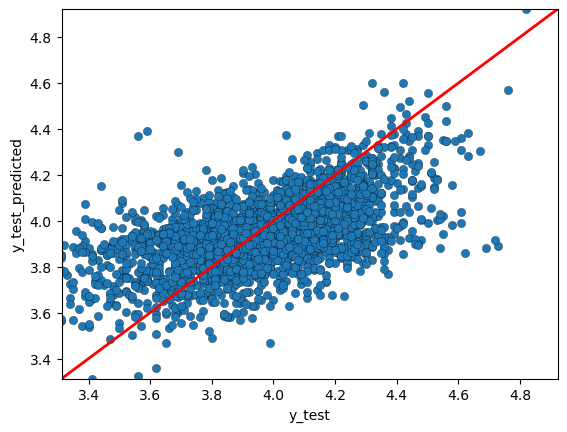

In [18]:
ridge_1 = Ridge()

ridge_1.fit(X=X_train,y=y_train)

y_test_predicted = ridge_1.predict(X_test)

# MAE (Mean Absolute Error)
mae_ridge_1 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_ridge_1 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_ridge_1= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_ridge_1 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_ridge_1 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_ridge_1)
print("\nMAPE:\n",mape_ridge_1)
print("\nMSE:\n",mse_ridge_1)
print("\nRMSE:\n",rmse_ridge_1)
print("\nR2:\n",r2_ridge_1)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

#making a copy of predicted values
y_test_predicted_1_ridge = y_test_predicted

residuals_1_ridge = y_test-y_test_predicted

## DecisionTree


MAE:
 0.21635172143974962

MAPE:
 0.055818318259510336

MSE:
 0.0814044307511737

RMSE:
 0.28531461713549433

R2:
 -0.12043314454719756


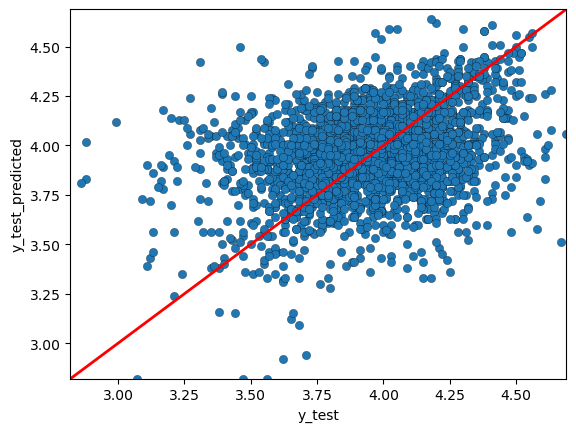

In [19]:
dt_1 = DecisionTreeRegressor()

dt_1.fit(X=X_train,y=y_train)

y_test_predicted = dt_1.predict(X_test)

# MAE (Mean Absolute Error)
mae_dt_1 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_dt_1 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_dt_1= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_dt_1 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_dt_1 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_dt_1)
print("\nMAPE:\n",mape_dt_1)
print("\nMSE:\n",mse_dt_1)
print("\nRMSE:\n",rmse_dt_1)
print("\nR2:\n",r2_dt_1)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## RandomForest


MAE:
 0.1802145717825472

MAPE:
 0.046629174024168316

MSE:
 0.05603235871752583

RMSE:
 0.23671155171965272

R2:
 0.22878261914055764


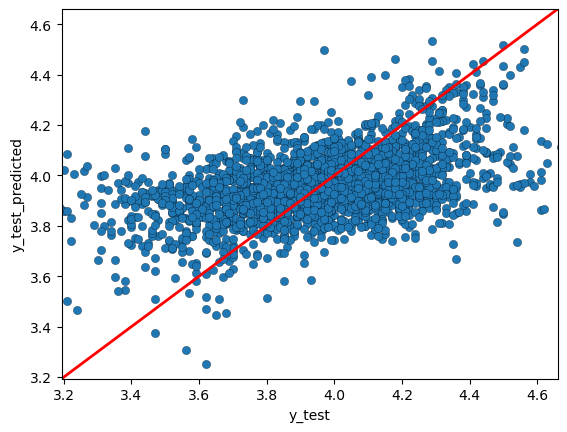

In [20]:
rf_1 = RandomForestRegressor()

rf_1.fit(X=X_train,y=y_train)

y_test_predicted = rf_1.predict(X_test)

# MAE (Mean Absolute Error)
mae_rf_1 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_rf_1 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_rf_1= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_rf_1 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_rf_1 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_rf_1)
print("\nMAPE:\n",mape_rf_1)
print("\nMSE:\n",mse_rf_1)
print("\nRMSE:\n",rmse_rf_1)
print("\nR2:\n",r2_rf_1)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

In [21]:
ev_metrics_1 ={'Linear Regression':[mae_lr_1,mape_lr_1,mse_lr_1,rmse_lr_1,r2_lr_1], 'Ridge':[mae_ridge_1,mape_ridge_1,mse_ridge_1,rmse_ridge_1,r2_ridge_1], 'Decision Tree':[mae_dt_1,mape_dt_1,mse_dt_1,rmse_dt_1,r2_dt_1],
            'Random Forest':[mae_rf_1,mape_rf_1,mse_rf_1,rmse_rf_1,r2_rf_1]}

ev_1 = pd.DataFrame(data=ev_metrics_1,index = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R^2'])

ev_1

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,0.177713,0.167360,0.216352,0.180215
MAPE,0.045860,0.043256,0.055818,0.046629
MSE,0.057201,0.049096,0.081404,0.056032
RMSE,0.239168,0.221576,0.285315,0.236712
R^2,0.212692,0.324255,-0.120433,0.228783


<a id="2"></a>

# Feature set 2

In [22]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [23]:

df_2 = df[["average_rating","num_pages","ratings_count","main_author"]]
#Encoding main_author
df_2= pd.concat([df_2,pd.get_dummies(df.main_author)],axis=1)
df_2= df_2.drop(columns=["main_author"])

In [24]:
df_2

,average_rating,num_pages,ratings_count,A.B. Yehoshua,A.D.P. Briggs,A.E. Cunningham,A.J. Jacobs,A.M. Homes,A.N. Roquelaure,A.S. Byatt,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
bookID,,,,,,,,,,,,,,,,,,,,,
1,4.57,652,2095690,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.49,870,2153167,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.42,352,6333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.56,435,2339585,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.78,2690,41428,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,512,156,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45633,4.08,635,783,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45634,3.96,415,820,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training and testing split:

In [25]:
df_train, df_test = train_test_split(df_2,test_size = 0.25)

In [26]:
len(df_2)

10222

In [27]:
len(df_train)

7666

In [28]:
len(df_test)

2556

In [29]:
df_2.mean(numeric_only=True)

average_rating               3.944992
num_pages                  348.422716
ratings_count            19497.570632
A.B. Yehoshua                0.000196
A.D.P. Briggs                0.000098
                             ...     
Zoë Heller                   0.000196
bell hooks                   0.000587
Åsne Seierstad               0.000196
Émile Zola                   0.000783
Éric-Emmanuel Schmitt        0.000098
Length: 3908, dtype: float64

In [30]:
df_train.mean(numeric_only=True)

average_rating               3.942253
num_pages                  346.037960
ratings_count            19400.529089
A.B. Yehoshua                0.000000
A.D.P. Briggs                0.000130
                             ...     
Zoë Heller                   0.000130
bell hooks                   0.000652
Åsne Seierstad               0.000000
Émile Zola                   0.001044
Éric-Emmanuel Schmitt        0.000130
Length: 3908, dtype: float64

In [31]:
df_test.mean(numeric_only=True)

average_rating               3.953208
num_pages                  355.575117
ratings_count            19788.619327
A.B. Yehoshua                0.000782
A.D.P. Briggs                0.000000
                             ...     
Zoë Heller                   0.000391
bell hooks                   0.000391
Åsne Seierstad               0.000782
Émile Zola                   0.000000
Éric-Emmanuel Schmitt        0.000000
Length: 3908, dtype: float64

In [32]:
df_train.columns.values

array(['average_rating', 'num_pages', 'ratings_count', ...,
       'Åsne Seierstad', 'Émile Zola', 'Éric-Emmanuel Schmitt'],
      dtype=object)

In [33]:
X_train = df_train.loc[:,df_train.columns[1:].values].values
X_train

array([[  384, 14798,     0, ...,     0,     0,     0],
       [  840,   413,     0, ...,     0,     0,     0],
       [  159,  5061,     0, ...,     0,     0,     0],
       ...,
       [  558,  1552,     0, ...,     0,     0,     0],
       [  272,  6711,     0, ...,     0,     0,     0],
       [  240,  3460,     0, ...,     0,     0,     0]], dtype=int64)

In [34]:
y_train = df_train.average_rating.values
y_train

array([3.85, 4.41, 3.7 , ..., 4.33, 3.29, 3.98])

In [35]:
X_test = df_test.loc[:,df_test.columns[1:].values].values
y_test = df_test.average_rating.values

In [36]:
#xxx

## LinearRegression


MAE:
 3918.622813250441

MAPE:
 1038.0459857948215

MSE:
 4952234326.844978

RMSE:
 70372.11327539467

R2:
 -66167409131.47196


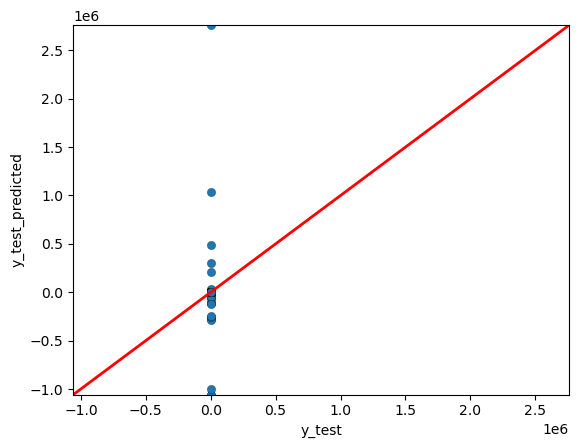

In [37]:
lr_2 = LinearRegression()

lr_2.fit(X=X_train,y=y_train)

y_test_predicted = lr_2.predict(X_test)

# MAE (Mean Absolute Error)
mae_lr_2 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_lr_2 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_lr_2= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_lr_2 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_lr_2 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_lr_2)
print("\nMAPE:\n",mape_lr_2)
print("\nMSE:\n",mse_lr_2)
print("\nRMSE:\n",rmse_lr_2)
print("\nR2:\n",r2_lr_2)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## Ridge


MAE:
 0.16972439155946845

MAPE:
 0.043919545271577334

MSE:
 0.05059115177557587

RMSE:
 0.2249247691464323

R2:
 0.3240454273596206


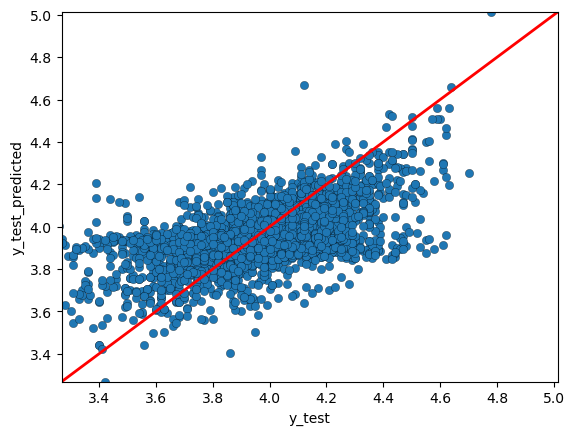

In [38]:
ridge_2 = Ridge()

ridge_2.fit(X=X_train,y=y_train)

y_test_predicted = ridge_2.predict(X_test)

# MAE (Mean Absolute Error)
mae_ridge_2 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_ridge_2 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_ridge_2= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_ridge_2 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_ridge_2 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_ridge_2)
print("\nMAPE:\n",mape_ridge_2)
print("\nMSE:\n",mse_ridge_2)
print("\nRMSE:\n",rmse_ridge_2)
print("\nR2:\n",r2_ridge_2)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

#making a copy of predicted values
y_test_predicted_2_ridge = y_test_predicted

residuals_2_ridge = y_test-y_test_predicted

## DecisionTree


MAE:
 0.21487480438184664

MAPE:
 0.05538964825969769

MSE:
 0.07836392801251957

RMSE:
 0.27993557832565613

R2:
 -0.04703003610399947


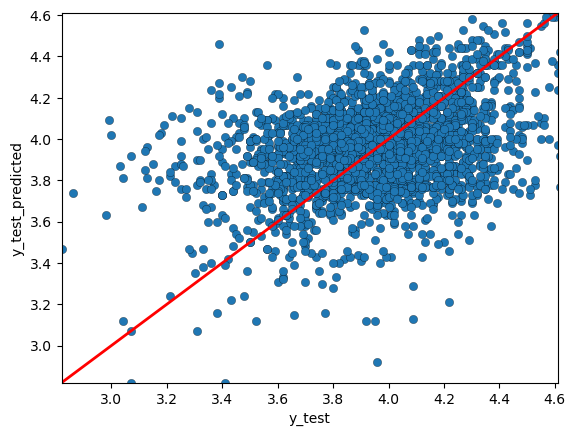

In [39]:
dt_2 = DecisionTreeRegressor()

dt_2.fit(X=X_train,y=y_train)

y_test_predicted = dt_2.predict(X_test)

# MAE (Mean Absolute Error)
mae_dt_2 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_dt_2 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_dt_2= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_dt_2 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_dt_2 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_dt_2)
print("\nMAPE:\n",mape_dt_2)
print("\nMSE:\n",mse_dt_2)
print("\nRMSE:\n",rmse_dt_2)
print("\nR2:\n",r2_dt_2)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## RandomForest


MAE:
 0.18084463354199265

MAPE:
 0.04685168049373427

MSE:
 0.056631128055664226

RMSE:
 0.23797295656369072

R2:
 0.24334456481993427


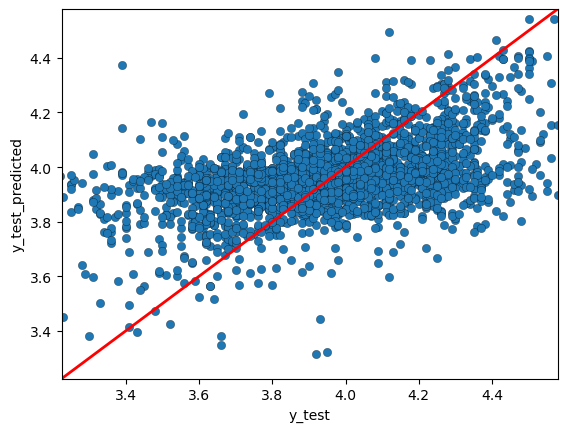

In [40]:
rf_2 = RandomForestRegressor()

rf_2.fit(X=X_train,y=y_train)

y_test_predicted = rf_2.predict(X_test)

# MAE (Mean Absolute Error)
mae_rf_2 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_rf_2 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_rf_2= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
#rmse_rf = float(format(np.sqrt(mean_squared_error(y_test, y_test_predicted)),'.3f'))
rmse_rf_2 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_rf_2 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_rf_2)
print("\nMAPE:\n",mape_rf_2)
print("\nMSE:\n",mse_rf_2)
print("\nRMSE:\n",rmse_rf_2)
print("\nR2:\n",r2_rf_2)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

In [41]:
ev_metrics_2 ={'Linear Regression':[mae_lr_2,mape_lr_2,mse_lr_2,rmse_lr_2,r2_lr_2], 'Ridge':[mae_ridge_2,mape_ridge_2,mse_ridge_2,rmse_ridge_2,r2_ridge_2], 'Decision Tree':[mae_dt_2,mape_dt_2,mse_dt_2,rmse_dt_2,r2_dt_2],
            'Random Forest':[mae_rf_2,mape_rf_2,mse_rf_2,rmse_rf_2,r2_rf_2]}

ev_2 = pd.DataFrame(data=ev_metrics_2,index = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R^2'])

ev_2

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,3.918623e+03,0.169724,0.214875,0.180845
MAPE,1.038046e+03,0.043920,0.055390,0.046852
MSE,4.952234e+09,0.050591,0.078364,0.056631
RMSE,7.037211e+04,0.224925,0.279936,0.237973
R^2,-6.616741e+10,0.324045,-0.047030,0.243345


<a id="3"></a>

# Feature set 3

In [42]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [43]:
df_3 = df[["average_rating","num_pages","ratings_count"]]

In [44]:
df_3

,average_rating,num_pages,ratings_count
bookID,,,
1,4.57,652,2095690
2,4.49,870,2153167
4,4.42,352,6333
5,4.56,435,2339585
8,4.78,2690,41428
...,...,...,...
45631,4.06,512,156
45633,4.08,635,783
45634,3.96,415,820


## Training and testing split:

In [45]:
df_train, df_test = train_test_split(df_3,test_size = 0.25)

In [46]:
len(df_3)

10222

In [47]:
len(df_train)

7666

In [48]:
len(df_test)

2556

In [49]:
df_1.mean(numeric_only=True)

average_rating        3.944992
num_pages           348.422716
ratings_count     19497.570632
A.B. Yehoshua         0.000196
A.D.P. Briggs         0.000098
                      ...     
小学館                   0.001272
皇冠文化出版有限公司            0.000196
聯經出版事業股份有限公司          0.000196
英文漢聲出版股份有限公司          0.000098
集英社                   0.000783
Length: 5099, dtype: float64

In [50]:
df_train.mean(numeric_only=True)

average_rating        3.942321
num_pages           349.683538
ratings_count     21157.411297
dtype: float64

In [51]:
df_test.mean(numeric_only=True)

average_rating        3.953005
num_pages           344.641236
ratings_count     14519.347418
dtype: float64

In [52]:
df_train.columns.values

array(['average_rating', 'num_pages', 'ratings_count'], dtype=object)

In [53]:
X_train = df_train.loc[:,df_train.columns[1:].values].values
X_train

array([[  320,  1464],
       [  756,   240],
       [  432,  1218],
       ...,
       [  113, 24181],
       [  226,  1776],
       [  304,  3373]], dtype=int64)

In [54]:
y_train = df_train.average_rating.values
y_train

array([3.9 , 4.48, 3.86, ..., 4.27, 3.97, 3.91])

In [55]:
X_test = df_test.loc[:,df_test.columns[1:].values].values
y_test = df_test.average_rating.values

In [56]:
#xxx

## LinearRegression


MAE:
 0.20378959655261233

MAPE:
 0.05232566177108801

MSE:
 0.06794048744427672

RMSE:
 0.2606539611137278

R2:
 0.029751986517662976


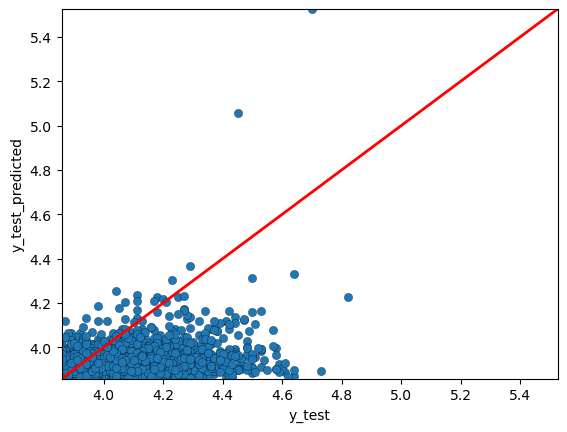

In [57]:
lr_3 = LinearRegression()

lr_3.fit(X=X_train,y=y_train)

y_test_predicted = lr_3.predict(X_test)

# MAE (Mean Absolute Error)
mae_lr_3 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_lr_3 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_lr_3= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_lr_3 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_lr_3 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_lr_3)
print("\nMAPE:\n",mape_lr_3)
print("\nMSE:\n",mse_lr_3)
print("\nRMSE:\n",rmse_lr_3)
print("\nR2:\n",r2_lr_3)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## Ridge


MAE:
 0.20378959654522094

MAPE:
 0.05232566176949742

MSE:
 0.06794048743811323

RMSE:
 0.2606539611019047

R2:
 0.02975198660568279


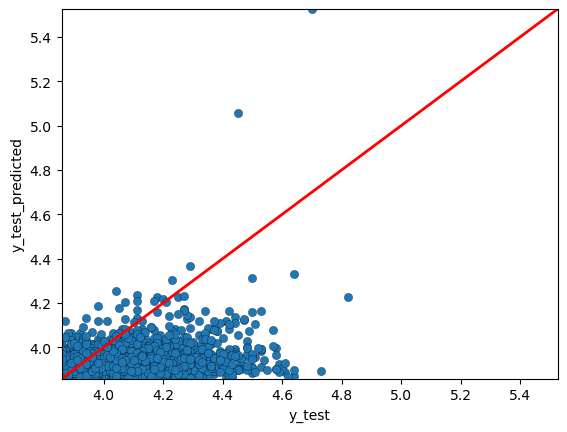

In [58]:
ridge_3 = Ridge()

ridge_3.fit(X=X_train,y=y_train)

y_test_predicted = ridge_3.predict(X_test)

# MAE (Mean Absolute Error)
mae_ridge_3 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_ridge_3 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_ridge_3= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_ridge_3 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_ridge_3 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_ridge_3)
print("\nMAPE:\n",mape_ridge_3)
print("\nMSE:\n",mse_ridge_3)
print("\nRMSE:\n",rmse_ridge_3)
print("\nR2:\n",r2_ridge_3)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## DecisionTree


MAE:
 0.29676284559207095

MAPE:
 0.07572095994825458

MSE:
 0.14325348390497306

RMSE:
 0.37848841977658054

R2:
 -1.0457817335682456


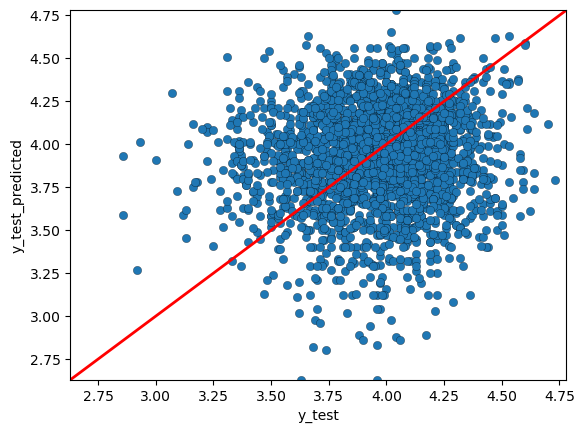

In [59]:
dt_3 = DecisionTreeRegressor()

dt_3.fit(X=X_train,y=y_train)

y_test_predicted = dt_3.predict(X_test)

# MAE (Mean Absolute Error)
mae_dt_3 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_dt_3 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_dt_3= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_dt_3 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_dt_3 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_dt_3)
print("\nMAPE:\n",mape_dt_3)
print("\nMSE:\n",mse_dt_3)
print("\nRMSE:\n",rmse_dt_3)
print("\nR2:\n",r2_dt_3)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## RandomForest


MAE:
 0.21956219242926694

MAPE:
 0.05624475519644294

MSE:
 0.07908555554079959

RMSE:
 0.28122154174387065

R2:
 -0.12940907616452146


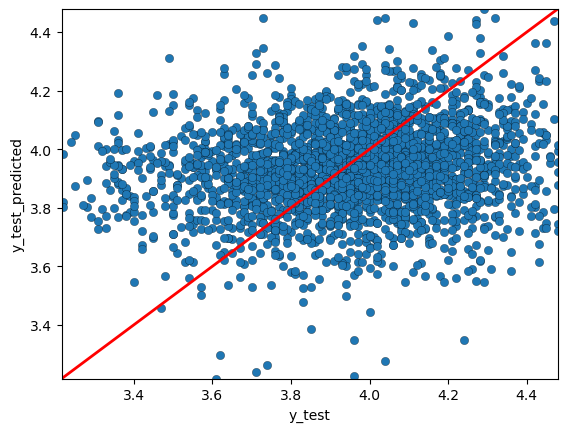

In [60]:
rf_3 = RandomForestRegressor()

rf_3.fit(X=X_train,y=y_train)

y_test_predicted = rf_3.predict(X_test)

# MAE (Mean Absolute Error)
mae_rf_3 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_rf_3 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_rf_3 = mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_rf_3 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_rf_3 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_rf_3)
print("\nMAPE:\n",mape_rf_3)
print("\nMSE:\n",mse_rf_3)
print("\nRMSE:\n",rmse_rf_3)
print("\nR2:\n",r2_rf_3)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

In [61]:
ev_metrics_3 ={'Linear Regression':[mae_lr_3,mape_lr_3,mse_lr_3,rmse_lr_3,r2_lr_3], 'Ridge':[mae_ridge_3,mape_ridge_3,mse_ridge_3,rmse_ridge_3,r2_ridge_3], 'Decision Tree':[mae_dt_3,mape_dt_3,mse_dt_3,rmse_dt_3,r2_dt_3],
            'Random Forest':[mae_rf_3,mape_rf_3,mse_rf_3,rmse_rf_3,r2_rf_3]}

ev_3 = pd.DataFrame(data=ev_metrics_3,index = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R^2'])

ev_3

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,0.203790,0.203790,0.296763,0.219562
MAPE,0.052326,0.052326,0.075721,0.056245
MSE,0.067940,0.067940,0.143253,0.079086
RMSE,0.260654,0.260654,0.378488,0.281222
R^2,0.029752,0.029752,-1.045782,-0.129409


<a id="4"></a>

# Feature set 4

In [227]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [228]:
df_4 = df[["average_rating","num_pages","main_author"]]
#Encoding main_author
df_4= pd.concat([df_4,pd.get_dummies(df.main_author)],axis=1)
df_4= df_4.drop(columns=["main_author"])

In [229]:
df_4

,average_rating,num_pages,A.B. Yehoshua,A.D.P. Briggs,A.E. Cunningham,A.J. Jacobs,A.M. Homes,A.N. Roquelaure,A.S. Byatt,Abbie Hoffman,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
bookID,,,,,,,,,,,,,,,,,,,,,
1,4.57,652,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.49,870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.42,352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.56,435,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.78,2690,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,512,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45633,4.08,635,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45634,3.96,415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training and testing split:

In [230]:
df_train, df_test = train_test_split(df_4,test_size = 0.25)

In [231]:
len(df_4)

10222

In [232]:
len(df_train)

7666

In [233]:
len(df_test)

2556

In [234]:
df_4.mean(numeric_only=True)

average_rating             3.944992
num_pages                348.422716
A.B. Yehoshua              0.000196
A.D.P. Briggs              0.000098
A.E. Cunningham            0.000098
                            ...    
Zoë Heller                 0.000196
bell hooks                 0.000587
Åsne Seierstad             0.000196
Émile Zola                 0.000783
Éric-Emmanuel Schmitt      0.000098
Length: 3907, dtype: float64

In [235]:
df_train.mean(numeric_only=True)

average_rating             3.944825
num_pages                347.665797
A.B. Yehoshua              0.000130
A.D.P. Briggs              0.000000
A.E. Cunningham            0.000000
                            ...    
Zoë Heller                 0.000130
bell hooks                 0.000522
Åsne Seierstad             0.000130
Émile Zola                 0.000522
Éric-Emmanuel Schmitt      0.000130
Length: 3907, dtype: float64

In [236]:
df_test.mean(numeric_only=True)

average_rating             3.945493
num_pages                350.692879
A.B. Yehoshua              0.000391
A.D.P. Briggs              0.000391
A.E. Cunningham            0.000391
                            ...    
Zoë Heller                 0.000391
bell hooks                 0.000782
Åsne Seierstad             0.000391
Émile Zola                 0.001565
Éric-Emmanuel Schmitt      0.000000
Length: 3907, dtype: float64

In [237]:
df_train.columns.values

array(['average_rating', 'num_pages', 'A.B. Yehoshua', ...,
       'Åsne Seierstad', 'Émile Zola', 'Éric-Emmanuel Schmitt'],
      dtype=object)

In [238]:
X_train = df_train.loc[:,df_train.columns[1:].values].values
X_train

array([[217,   0,   0, ...,   0,   0,   0],
       [343,   0,   0, ...,   0,   0,   0],
       [ 56,   0,   0, ...,   0,   0,   0],
       ...,
       [160,   0,   0, ...,   0,   0,   0],
       [349,   0,   0, ...,   0,   0,   0],
       [240,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [239]:
y_train = df_train.average_rating.values
y_train

array([4.03, 3.85, 4.5 , ..., 4.  , 3.43, 4.16])

In [240]:
X_test = df_test.loc[:,df_test.columns[1:].values].values
y_test = df_test.average_rating.values

In [241]:
#xxx

## LinearRegression


MAE:
 3782683.9223181987

MAPE:
 954938.5529555983

MSE:
 1550681217821573.8

RMSE:
 39378689.89468255

R2:
 -2.0433797328615864e+16


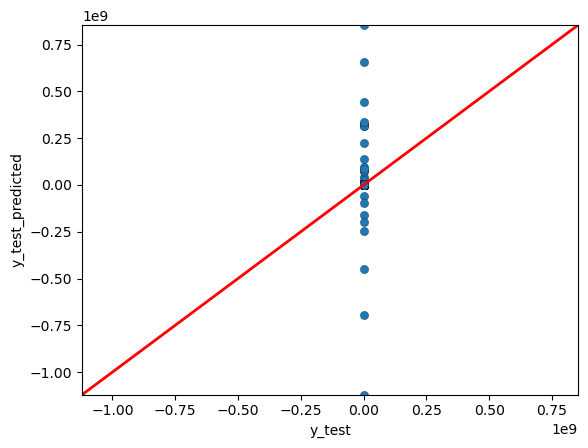

In [242]:
lr_4 = LinearRegression()

lr_4.fit(X=X_train,y=y_train)

y_test_predicted = lr_4.predict(X_test)

# MAE (Mean Absolute Error)
mae_lr_4 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_lr_4 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_lr_4= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_lr_4 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_lr_4 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_lr_4)
print("\nMAPE:\n",mape_lr_4)
print("\nMSE:\n",mse_lr_4)
print("\nRMSE:\n",rmse_lr_4)
print("\nR2:\n",r2_lr_4)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## Ridge


MAE:
 0.17084181489039818

MAPE:
 0.04429881511454825

MSE:
 0.05201524689348047

RMSE:
 0.22806851359510474

R2:
 0.31457929534193085


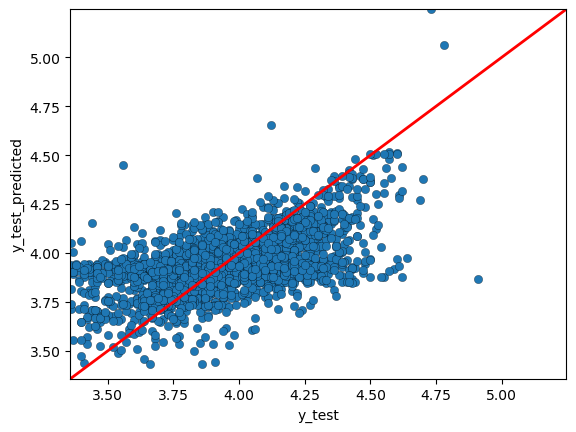

In [243]:
ridge_4 = Ridge()

ridge_4.fit(X=X_train,y=y_train)

y_test_predicted = ridge_4.predict(X_test)

# MAE (Mean Absolute Error)
mae_ridge_4 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_ridge_4 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_ridge_4= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_ridge_4 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_ridge_4 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_ridge_4)
print("\nMAPE:\n",mape_ridge_4)
print("\nMSE:\n",mse_ridge_4)
print("\nRMSE:\n",rmse_ridge_4)
print("\nR2:\n",r2_ridge_4)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

#making a copy of predicted values
y_test_predicted_4_ridge = y_test_predicted
#calculating residuals
residuals_4_ridge = y_test-y_test_predicted

## DecisionTree


MAE:
 0.1933781624934794

MAPE:
 0.050230347198953015

MSE:
 0.06912059792047036

RMSE:
 0.2629079647338025

R2:
 0.08917689019036457


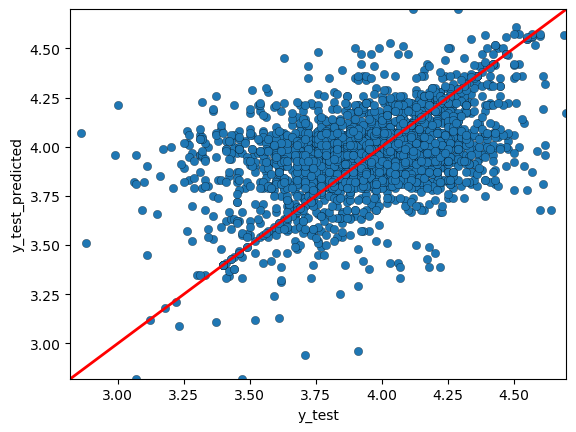

In [244]:
dt_4 = DecisionTreeRegressor()

dt_4.fit(X=X_train,y=y_train)

y_test_predicted = dt_4.predict(X_test)

# MAE (Mean Absolute Error)
mae_dt_4 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_dt_4 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_dt_4= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_dt_4 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_dt_4 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_dt_4)
print("\nMAPE:\n",mape_dt_4)
print("\nMSE:\n",mse_dt_4)
print("\nRMSE:\n",rmse_dt_4)
print("\nR2:\n",r2_dt_4)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## RandomForest


MAE:
 0.18041727646419842

MAPE:
 0.04699017394114581

MSE:
 0.05764149150033862

RMSE:
 0.24008642506468086

R2:
 0.24044056154127047


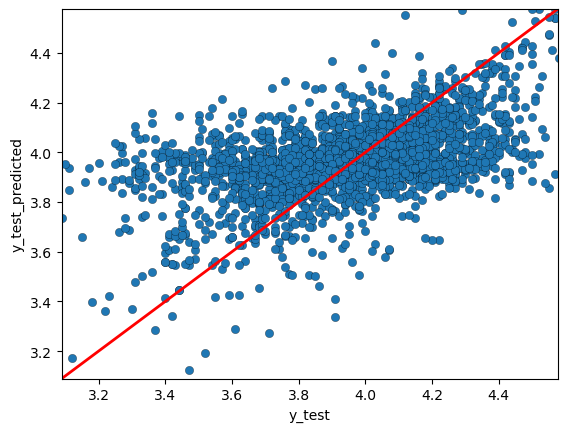

In [245]:
rf_4 = RandomForestRegressor()

rf_4.fit(X=X_train,y=y_train)

y_test_predicted = rf_4.predict(X_test)

y_test_predicted[:50]

y_test[:50]

# MAE (Mean Absolute Error)
mae_rf_4 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_rf_4 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_rf_4 = mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_rf_4 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_rf_4 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_rf_4)
print("\nMAPE:\n",mape_rf_4)
print("\nMSE:\n",mse_rf_4)
print("\nRMSE:\n",rmse_rf_4)
print("\nR2:\n",r2_rf_4)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

In [246]:
ev_metrics_4 ={'Linear Regression':[mae_lr_4,mape_lr_4,mse_lr_4,rmse_lr_4,r2_lr_4], 'Ridge':[mae_ridge_4,mape_ridge_4,mse_ridge_4,rmse_ridge_4,r2_ridge_4], 'Decision Tree':[mae_dt_4,mape_dt_4,mse_dt_4,rmse_dt_4,r2_dt_4],
            'Random Forest':[mae_rf_4,mape_rf_4,mse_rf_4,rmse_rf_4,r2_rf_4]}

ev_4 = pd.DataFrame(data=ev_metrics_4,index = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R^2'])

ev_4

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,3.782684e+06,0.170842,0.193378,0.180417
MAPE,9.549386e+05,0.044299,0.050230,0.046990
MSE,1.550681e+15,0.052015,0.069121,0.057641
RMSE,3.937869e+07,0.228069,0.262908,0.240086
R^2,-2.043380e+16,0.314579,0.089177,0.240441


<a id="5"></a>

# Feature set 5

In [117]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [118]:
df_5 = df[["average_rating","ratings_count","main_author"]]
#Encoding main_author
df_5= pd.concat([df_5,pd.get_dummies(df.main_author)],axis=1)
df_5= df_5.drop(columns=["main_author"])

In [119]:
df_5

,average_rating,ratings_count,A.B. Yehoshua,A.D.P. Briggs,A.E. Cunningham,A.J. Jacobs,A.M. Homes,A.N. Roquelaure,A.S. Byatt,Abbie Hoffman,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
bookID,,,,,,,,,,,,,,,,,,,,,
1,4.57,2095690,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.49,2153167,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.42,6333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.56,2339585,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.78,41428,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,156,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45633,4.08,783,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45634,3.96,820,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training and testing split:

In [120]:
df_train, df_test = train_test_split(df_5,test_size = 0.25)

In [121]:
len(df_5)

10222

In [122]:
len(df_train)

7666

In [123]:
len(df_test)

2556

In [124]:
df_5.mean(numeric_only=True)

average_rating               3.944992
ratings_count            19497.570632
A.B. Yehoshua                0.000196
A.D.P. Briggs                0.000098
A.E. Cunningham              0.000098
                             ...     
Zoë Heller                   0.000196
bell hooks                   0.000587
Åsne Seierstad               0.000196
Émile Zola                   0.000783
Éric-Emmanuel Schmitt        0.000098
Length: 3907, dtype: float64

In [125]:
df_train.mean(numeric_only=True)

average_rating               3.945329
ratings_count            20644.055961
A.B. Yehoshua                0.000130
A.D.P. Briggs                0.000000
A.E. Cunningham              0.000000
                             ...     
Zoë Heller                   0.000130
bell hooks                   0.000783
Åsne Seierstad               0.000261
Émile Zola                   0.000652
Éric-Emmanuel Schmitt        0.000130
Length: 3907, dtype: float64

In [126]:
df_test.mean(numeric_only=True)

average_rating               3.943983
ratings_count            16059.011737
A.B. Yehoshua                0.000391
A.D.P. Briggs                0.000391
A.E. Cunningham              0.000391
                             ...     
Zoë Heller                   0.000391
bell hooks                   0.000000
Åsne Seierstad               0.000000
Émile Zola                   0.001174
Éric-Emmanuel Schmitt        0.000000
Length: 3907, dtype: float64

In [127]:
df_train.columns.values

array(['average_rating', 'ratings_count', 'A.B. Yehoshua', ...,
       'Åsne Seierstad', 'Émile Zola', 'Éric-Emmanuel Schmitt'],
      dtype=object)

In [128]:
X_train = df_train.loc[:,df_train.columns[1:].values].values
X_train

array([[7726,    0,    0, ...,    0,    0,    0],
       [ 689,    0,    0, ...,    0,    0,    0],
       [  87,    0,    0, ...,    0,    0,    0],
       ...,
       [  99,    0,    0, ...,    0,    0,    0],
       [ 584,    0,    0, ...,    0,    0,    0],
       [ 227,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [129]:
y_train = df_train.average_rating.values
y_train

array([4.11, 3.94, 3.68, ..., 3.58, 4.18, 3.81])

In [130]:
X_test = df_test.loc[:,df_test.columns[1:].values].values
y_test = df_test.average_rating.values

In [131]:
#xxx

## LinearRegression


MAE:
 8245.142512241426

MAPE:
 2137.5053150907265

MSE:
 4935260265.954339

RMSE:
 70251.40757276212

R2:
 -64903470263.413956


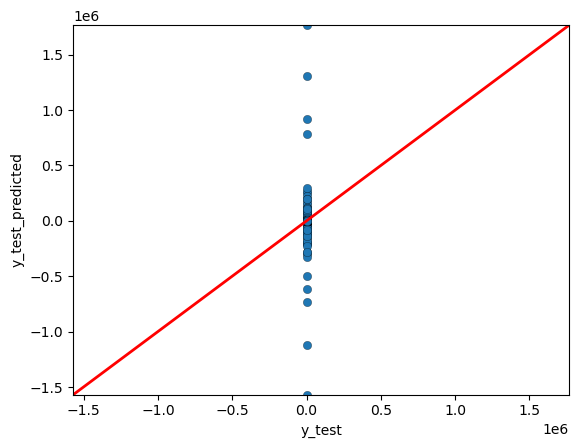

In [132]:
lr_5 = LinearRegression()

lr_5.fit(X=X_train,y=y_train)

y_test_predicted = lr_5.predict(X_test)

# MAE (Mean Absolute Error)
mae_lr_5 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_lr_5 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_lr_5= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_lr_5 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_lr_5 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_lr_5)
print("\nMAPE:\n",mape_lr_5)
print("\nMSE:\n",mse_lr_5)
print("\nRMSE:\n",rmse_lr_5)
print("\nR2:\n",r2_lr_5)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## Ridge


MAE:
 0.17895700869488806

MAPE:
 0.04636640477279909

MSE:
 0.05585481096187997

RMSE:
 0.23633622439626129

R2:
 0.26545493711914014


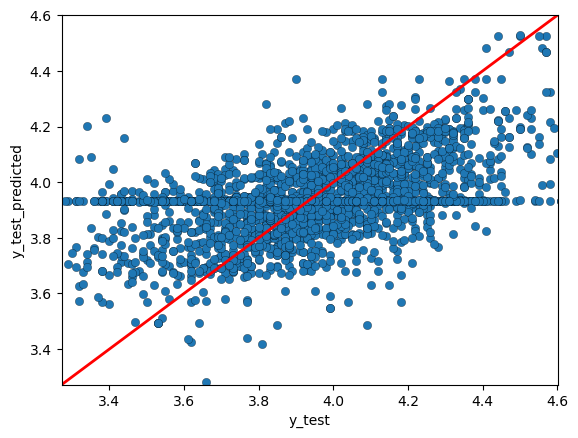

In [133]:
ridge_5 = Ridge()

ridge_5.fit(X=X_train,y=y_train)

y_test_predicted = ridge_5.predict(X_test)

# MAE (Mean Absolute Error)
mae_ridge_5 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_ridge_5 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_ridge_5= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_ridge_5 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_ridge_5 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_ridge_5)
print("\nMAPE:\n",mape_ridge_5)
print("\nMSE:\n",mse_ridge_5)
print("\nRMSE:\n",rmse_ridge_5)
print("\nR2:\n",r2_ridge_5)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## DecisionTree


MAE:
 0.21043231611893584

MAPE:
 0.054492197149336244

MSE:
 0.0779220755086072

RMSE:
 0.27914525879657565

R2:
 -0.024751044155185253


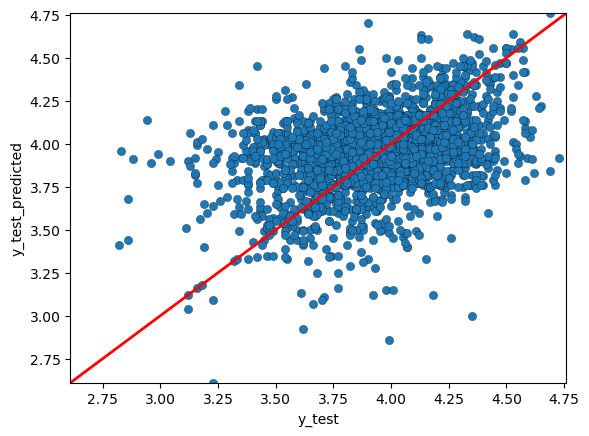

In [134]:
dt_5 = DecisionTreeRegressor()

dt_5.fit(X=X_train,y=y_train)

y_test_predicted = dt_5.predict(X_test)

# MAE (Mean Absolute Error)
mae_dt_5 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_dt_5 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_dt_5= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_dt_5 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_dt_5 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_dt_5)
print("\nMAPE:\n",mape_dt_5)
print("\nMSE:\n",mse_dt_5)
print("\nRMSE:\n",rmse_dt_5)
print("\nR2:\n",r2_dt_5)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## RandomForest


MAE:
 0.18781379303599377

MAPE:
 0.04879940979833146

MSE:
 0.0612760461059226

RMSE:
 0.247539988902647

R2:
 0.19416042477193218


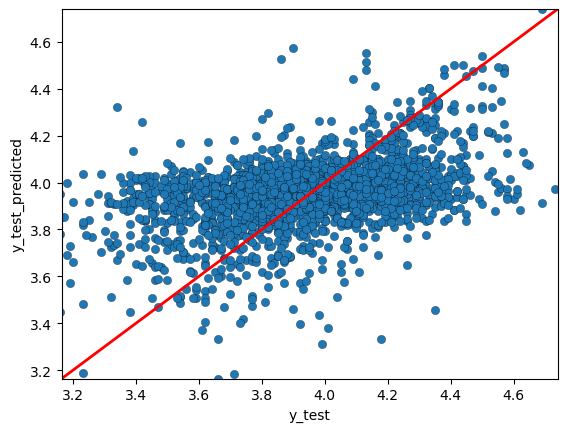

In [135]:
rf_5 = RandomForestRegressor()

rf_5.fit(X=X_train,y=y_train)

y_test_predicted = rf_5.predict(X_test)

# MAE (Mean Absolute Error)
mae_rf_5 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_rf_5 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_rf_5 = mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_rf_5 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_rf_5 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_rf_5)
print("\nMAPE:\n",mape_rf_5)
print("\nMSE:\n",mse_rf_5)
print("\nRMSE:\n",rmse_rf_5)
print("\nR2:\n",r2_rf_5)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

In [136]:
ev_metrics_5 ={'Linear Regression':[mae_lr_5,mape_lr_5,mse_lr_5,rmse_lr_5,r2_lr_5], 'Ridge':[mae_ridge_5,mape_ridge_5,mse_ridge_5,rmse_ridge_5,r2_ridge_5], 'Decision Tree':[mae_dt_5,mape_dt_5,mse_dt_5,rmse_dt_5,r2_dt_5],
            'Random Forest':[mae_rf_5,mape_rf_5,mse_rf_5,rmse_rf_5,r2_rf_5]}

ev_5 = pd.DataFrame(data=ev_metrics_5,index = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R^2'])

ev_5

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,8.245143e+03,0.178957,0.210432,0.187814
MAPE,2.137505e+03,0.046366,0.054492,0.048799
MSE,4.935260e+09,0.055855,0.077922,0.061276
RMSE,7.025141e+04,0.236336,0.279145,0.247540
R^2,-6.490347e+10,0.265455,-0.024751,0.194160


<a id="6"></a>

# Feature set 6

In [137]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [138]:
df_6 = df[["average_rating","main_author"]]
#Encoding main_author
df_6= pd.concat([df_6,pd.get_dummies(df.main_author)],axis=1)
df_6= df_6.drop(columns=["main_author"])

In [139]:
df_6

,average_rating,A.B. Yehoshua,A.D.P. Briggs,A.E. Cunningham,A.J. Jacobs,A.M. Homes,A.N. Roquelaure,A.S. Byatt,Abbie Hoffman,Abdul Rahman Munif,...,Zak Smith,Zecharia Sitchin,Zilpha Keatley Snyder,Zolar,Zora Neale Hurston,Zoë Heller,bell hooks,Åsne Seierstad,Émile Zola,Éric-Emmanuel Schmitt
bookID,,,,,,,,,,,,,,,,,,,,,
1,4.57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45633,4.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45634,3.96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training and testing split:

In [140]:
df_train, df_test = train_test_split(df_6,test_size = 0.25)

In [141]:
len(df_6)

10222

In [142]:
len(df_train)

7666

In [143]:
len(df_test)

2556

In [144]:
df_6.mean(numeric_only=True)

average_rating           3.944992
A.B. Yehoshua            0.000196
A.D.P. Briggs            0.000098
A.E. Cunningham          0.000098
A.J. Jacobs              0.000098
                           ...   
Zoë Heller               0.000196
bell hooks               0.000587
Åsne Seierstad           0.000196
Émile Zola               0.000783
Éric-Emmanuel Schmitt    0.000098
Length: 3906, dtype: float64

In [145]:
df_train.mean(numeric_only=True)

average_rating           3.946454
A.B. Yehoshua            0.000261
A.D.P. Briggs            0.000130
A.E. Cunningham          0.000130
A.J. Jacobs              0.000130
                           ...   
Zoë Heller               0.000261
bell hooks               0.000522
Åsne Seierstad           0.000130
Émile Zola               0.000913
Éric-Emmanuel Schmitt    0.000130
Length: 3906, dtype: float64

In [146]:
df_test.mean(numeric_only=True)

average_rating           3.940606
A.B. Yehoshua            0.000000
A.D.P. Briggs            0.000000
A.E. Cunningham          0.000000
A.J. Jacobs              0.000000
                           ...   
Zoë Heller               0.000000
bell hooks               0.000782
Åsne Seierstad           0.000391
Émile Zola               0.000391
Éric-Emmanuel Schmitt    0.000000
Length: 3906, dtype: float64

In [147]:
df_train.columns.values

array(['average_rating', 'A.B. Yehoshua', 'A.D.P. Briggs', ...,
       'Åsne Seierstad', 'Émile Zola', 'Éric-Emmanuel Schmitt'],
      dtype=object)

In [148]:
X_train = df_train.loc[:,df_train.columns[1:].values].values
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [149]:
y_train = df_train.average_rating.values
y_train

array([4.15, 4.05, 3.5 , ..., 3.87, 4.1 , 4.02])

In [150]:
X_test = df_test.loc[:,df_test.columns[1:].values].values
y_test = df_test.average_rating.values

In [151]:
#xxx

## LinearRegression


MAE:
 3782683.9223181987

MAPE:
 954938.5529555983

MSE:
 1550681217821573.8

RMSE:
 39378689.89468255

R2:
 -2.0433797328615864e+16


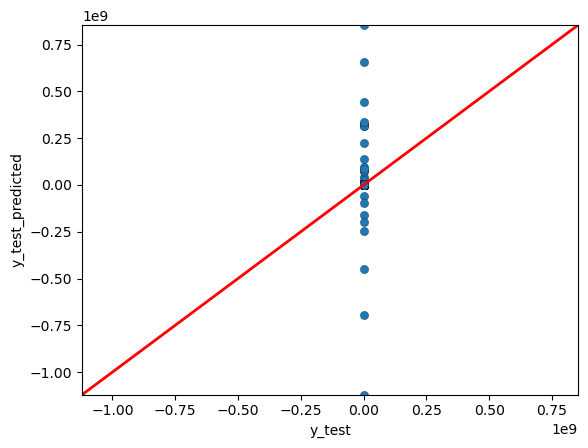

In [247]:
lr_6 = LinearRegression()

lr_6.fit(X=X_train,y=y_train)

y_test_predicted = lr_6.predict(X_test)

# MAE (Mean Absolute Error)
mae_lr_6 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_lr_6 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_lr_6= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_lr_6 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_lr_6 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_lr_6)
print("\nMAPE:\n",mape_lr_6)
print("\nMSE:\n",mse_lr_6)
print("\nRMSE:\n",rmse_lr_6)
print("\nR2:\n",r2_lr_6)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## Ridge


MAE:
 0.17084181489039818

MAPE:
 0.04429881511454825

MSE:
 0.05201524689348047

RMSE:
 0.22806851359510474

R2:
 0.31457929534193085


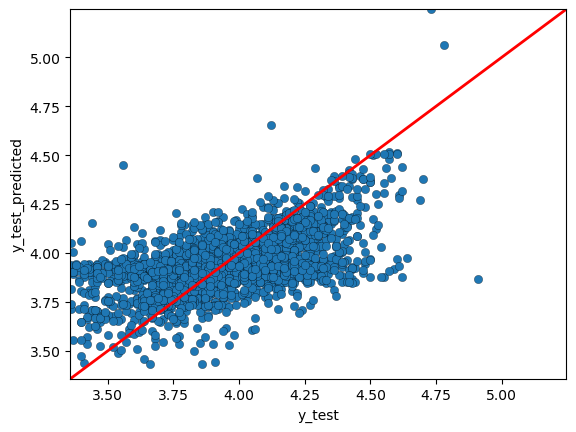

In [248]:
ridge_6 = Ridge()

ridge_6.fit(X=X_train,y=y_train)

y_test_predicted = ridge_6.predict(X_test)

# MAE (Mean Absolute Error)
mae_ridge_6 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_ridge_6 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_ridge_6= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_ridge_6 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_ridge_6 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_ridge_6)
print("\nMAPE:\n",mape_ridge_6)
print("\nMSE:\n",mse_ridge_6)
print("\nRMSE:\n",rmse_ridge_6)
print("\nR2:\n",r2_ridge_6)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## DecisionTree


MAE:
 0.1936794144496609

MAPE:
 0.05030717846476543

MSE:
 0.06926600089386627

RMSE:
 0.2631843477372206

R2:
 0.08726087105296632


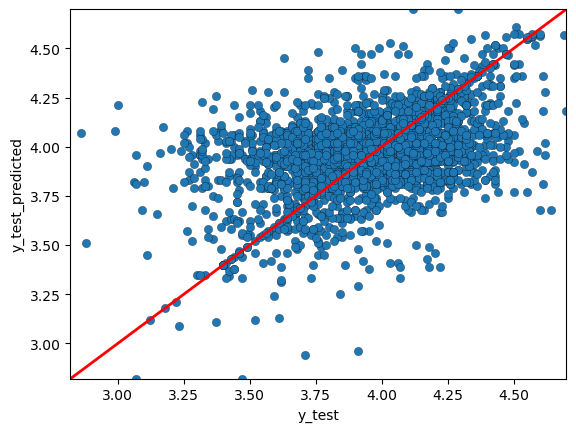

In [249]:
dt_6 = DecisionTreeRegressor()

dt_6.fit(X=X_train,y=y_train)

y_test_predicted = dt_6.predict(X_test)

# MAE (Mean Absolute Error)
mae_dt_6 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_dt_6 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_dt_6= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_dt_6 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_dt_6 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_dt_6)
print("\nMAPE:\n",mape_dt_6)
print("\nMSE:\n",mse_dt_6)
print("\nRMSE:\n",rmse_dt_6)
print("\nR2:\n",r2_dt_6)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## RandomForest

RandomForestRegressor with feature set 6 took too much computational time. Therefore, it will not be used with this feature set.

In [250]:
#rf_6 = RandomForestRegressor()

#rf_6.fit(X=X_train,y=y_train)

#y_test_predicted = rf_6.predict(X_test)

# MAE (Mean Absolute Error)
#mae_rf_6 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
#mape_rf_6 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
#mse_rf_6 = mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
#rmse_rf_6 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
#r2_rf_6 = r2_score(y_test, y_test_predicted)

#print("\nMAE:\n",mae_rf_6)
#print("\nMAPE:\n",mape_rf_6)
#print("\nMSE:\n",mse_rf_6)
#print("\nRMSE:\n",rmse_rf_6)
#print("\nR2:\n",r2_rf_6)

#plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
#plt.title("")
#plt.xlabel("y_test")
#plt.ylabel("y_test_predicted")
#plt.axline((0,0),slope=1, linewidth=2, color='r')
#plt.xlim(min(y_test_predicted), max(y_test_predicted))
#plt.ylim(min(y_test_predicted), max(y_test_predicted))
#plt.show()

In [251]:
ev_metrics_6 ={'Linear Regression':[mae_lr_6,mape_lr_6,mse_lr_6,rmse_lr_6,r2_lr_6], 'Ridge':[mae_ridge_6,mape_ridge_6,mse_ridge_6,rmse_ridge_6,r2_ridge_6], 'Decision Tree':[mae_dt_6,mape_dt_6,mse_dt_6,rmse_dt_6,r2_dt_6]}

ev_6 = pd.DataFrame(data=ev_metrics_6,index = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R^2'])

ev_6

,Linear Regression,Ridge,Decision Tree
MAE,3.782684e+06,0.170842,0.193679
MAPE,9.549386e+05,0.044299,0.050307
MSE,1.550681e+15,0.052015,0.069266
RMSE,3.937869e+07,0.228069,0.263184
R^2,-2.043380e+16,0.314579,0.087261


<a id="7"></a>

# Feature set 7

In [157]:
df

,average_rating,num_pages,ratings_count,main_author,parent_publisher
bookID,,,,,
1,4.57,652,2095690,J.K. Rowling,Scholastic
2,4.49,870,2153167,J.K. Rowling,Scholastic
4,4.42,352,6333,J.K. Rowling,Scholastic
5,4.56,435,2339585,J.K. Rowling,Scholastic
8,4.78,2690,41428,J.K. Rowling,Scholastic
...,...,...,...,...,...
45631,4.06,512,156,William T. Vollmann,Da
45633,4.08,635,783,William T. Vollmann,Penguin
45634,3.96,415,820,William T. Vollmann,Penguin


In [158]:

df_7 = df[["average_rating","main_author","parent_publisher"]]
#Encoding main_author
df_7= pd.concat([df_7,pd.get_dummies(df.main_author)],axis=1)
df_7= df_7.drop(columns=["main_author"])
#Encoding parent_publisher
df_7= pd.concat([df_7,pd.get_dummies(df.parent_publisher)],axis=1)
df_7= df_7.drop(columns=["parent_publisher"])

In [159]:
df_7

,average_rating,A.B. Yehoshua,A.D.P. Briggs,A.E. Cunningham,A.J. Jacobs,A.M. Homes,A.N. Roquelaure,A.S. Byatt,Abbie Hoffman,Abdul Rahman Munif,...,wo,yndale,Éditions,Эксмо,ガンガンコミックス,小学館,皇冠文化出版有限公司,聯經出版事業股份有限公司,英文漢聲出版股份有限公司,集英社
bookID,,,,,,,,,,,,,,,,,,,,,
1,4.57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,4.06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45633,4.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45634,3.96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training and testing split:

In [160]:
df_train, df_test = train_test_split(df_7,test_size = 0.25)

In [161]:
len(df_7)

10222

In [162]:
len(df_train)

7666

In [163]:
len(df_test)

2556

In [164]:
df_7.mean(numeric_only=True)

average_rating     3.944992
A.B. Yehoshua      0.000196
A.D.P. Briggs      0.000098
A.E. Cunningham    0.000098
A.J. Jacobs        0.000098
                     ...   
小学館                0.001272
皇冠文化出版有限公司         0.000196
聯經出版事業股份有限公司       0.000196
英文漢聲出版股份有限公司       0.000098
集英社                0.000783
Length: 5097, dtype: float64

In [165]:
df_train.mean(numeric_only=True)

average_rating     3.942973
A.B. Yehoshua      0.000130
A.D.P. Briggs      0.000130
A.E. Cunningham    0.000000
A.J. Jacobs        0.000130
                     ...   
小学館                0.001304
皇冠文化出版有限公司         0.000130
聯經出版事業股份有限公司       0.000130
英文漢聲出版股份有限公司       0.000130
集英社                0.001044
Length: 5097, dtype: float64

In [166]:
df_test.mean(numeric_only=True)

average_rating     3.951049
A.B. Yehoshua      0.000391
A.D.P. Briggs      0.000000
A.E. Cunningham    0.000391
A.J. Jacobs        0.000000
                     ...   
小学館                0.001174
皇冠文化出版有限公司         0.000391
聯經出版事業股份有限公司       0.000391
英文漢聲出版股份有限公司       0.000000
集英社                0.000000
Length: 5097, dtype: float64

In [167]:
df_train.columns.values

array(['average_rating', 'A.B. Yehoshua', 'A.D.P. Briggs', ...,
       '聯經出版事業股份有限公司', '英文漢聲出版股份有限公司', '集英社'], dtype=object)

In [168]:
X_train = df_train.loc[:,df_train.columns[1:].values].values
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [169]:
y_train = df_train.average_rating.values
y_train

array([3.78, 3.92, 4.22, ..., 3.82, 4.2 , 3.78])

In [170]:
X_test = df_test.loc[:,df_test.columns[1:].values].values
y_test = df_test.average_rating.values

## LinearRegression


MAE:
 2026682478093.3193

MAPE:
 518060163609.2725

MSE:
 2.6454971331263655e+25

RMSE:
 5143439640091.41

R2:
 -3.488017173999546e+26


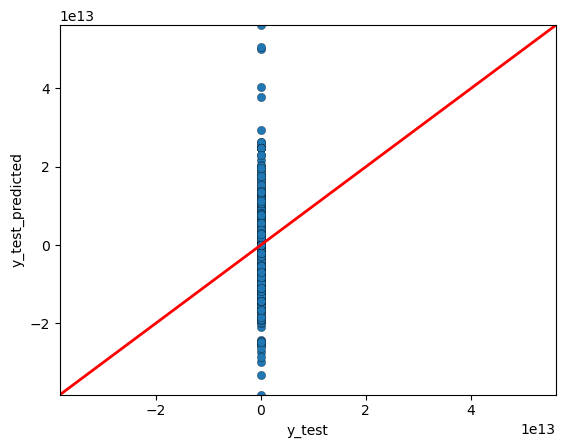

In [171]:
lr_7 = LinearRegression()

lr_7.fit(X=X_train,y=y_train)

y_test_predicted = lr_7.predict(X_test)

# MAE (Mean Absolute Error)
mae_lr_7 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_lr_7 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_lr_7= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_lr_7 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_lr_7 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_lr_7)
print("\nMAPE:\n",mape_lr_7)
print("\nMSE:\n",mse_lr_7)
print("\nRMSE:\n",rmse_lr_7)
print("\nR2:\n",r2_lr_7)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## Ridge


MAE:
 0.17831604448508492

MAPE:
 0.045994665445182686

MSE:
 0.05546987645272406

RMSE:
 0.235520437441688

R2:
 0.2686445232390554


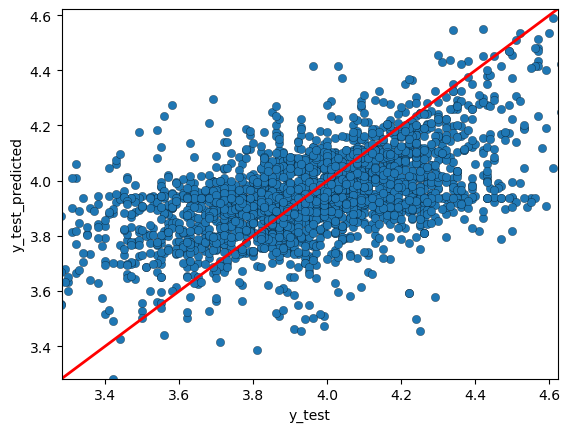

In [172]:
ridge_7 = Ridge()

ridge_7.fit(X=X_train,y=y_train)

y_test_predicted = ridge_7.predict(X_test)

# MAE (Mean Absolute Error)
mae_ridge_7 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_ridge_7 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_ridge_7= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_ridge_7 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_ridge_7 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_ridge_7)
print("\nMAPE:\n",mape_ridge_7)
print("\nMSE:\n",mse_ridge_7)
print("\nRMSE:\n",rmse_ridge_7)
print("\nR2:\n",r2_ridge_7)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## DecisionTree


MAE:
 0.19321241273940806

MAPE:
 0.049957049713600696

MSE:
 0.06930701717582767

RMSE:
 0.26326225930776265

R2:
 0.08620552575582319


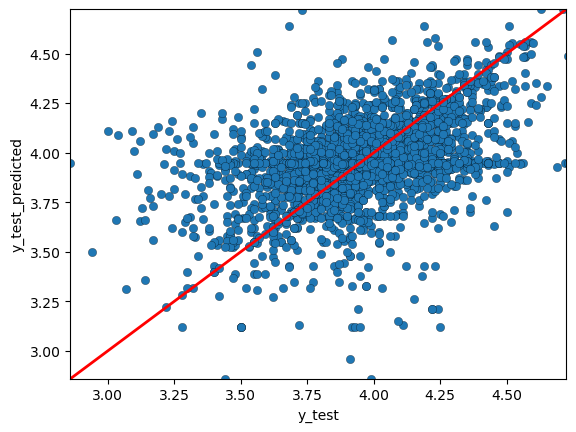

In [173]:
dt_7 = DecisionTreeRegressor()

dt_7.fit(X=X_train,y=y_train)

y_test_predicted = dt_7.predict(X_test)

# MAE (Mean Absolute Error)
mae_dt_7 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
mape_dt_7 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
mse_dt_7= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
rmse_dt_7 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
r2_dt_7 = r2_score(y_test, y_test_predicted)

print("\nMAE:\n",mae_dt_7)
print("\nMAPE:\n",mape_dt_7)
print("\nMSE:\n",mse_dt_7)
print("\nRMSE:\n",rmse_dt_7)
print("\nR2:\n",r2_dt_7)

plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
plt.title("")
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.axline((0,0),slope=1, linewidth=2, color='r')
plt.xlim(min(y_test_predicted), max(y_test_predicted))
plt.ylim(min(y_test_predicted), max(y_test_predicted))
plt.show()

## RandomForest

RandomForestRegressor with feature set 7 took too much computational time. Therefore, it will not be used with this feature set.

In [175]:
#rf_7 = RandomForestRegressor()

#rf_7.fit(X=X_train,y=y_train)

#y_test_predicted = rf_7.predict(X_test)

# MAE (Mean Absolute Error)
#mae_rf_7 = mean_absolute_error(y_test, y_test_predicted)

# MAPE (Mean Absolute Percentage Error)
#mape_rf_7 = mean_absolute_percentage_error(y_test, y_test_predicted)

# MSE (Mean Squared Error)
#mse_rf_7= mean_squared_error(y_test, y_test_predicted)

# RMSE (Root Mean Square Error)
#rmse_rf_7 = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# R2 score
#r2_rf_7 = r2_score(y_test, y_test_predicted)

#print("\nMAE:\n",mae_rf_7)
#print("\nMAPE:\n",mape_rf_7)
#print("\nMSE:\n",mse_rf_7)
#print("\nRMSE:\n",rmse_rf_7)
#print("\nR2:\n",r2_rf_7)

#plt.scatter(y_test,y_test_predicted, edgecolors="black", linewidths=0.2)
#plt.title("")
#plt.xlabel("y_test")
#plt.ylabel("y_test_predicted")
#plt.axline((0,0),slope=1, linewidth=2, color='r')
#plt.xlim(min(y_test_predicted), max(y_test_predicted))
#plt.ylim(min(y_test_predicted), max(y_test_predicted))
#plt.show()

In [176]:
ev_metrics_7 ={'Linear Regression':[mae_lr_7,mape_lr_7,mse_lr_7,rmse_lr_7,r2_lr_7], 'Ridge':[mae_ridge_7,mape_ridge_7,mse_ridge_7,rmse_ridge_7,r2_ridge_7], 'Decision Tree':[mae_dt_7,mape_dt_7,mse_dt_7,rmse_dt_7,r2_dt_7]}

ev_7 = pd.DataFrame(data=ev_metrics_7,index = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R^2'])

ev_7

,Linear Regression,Ridge,Decision Tree
MAE,2.026682e+12,0.178316,0.193212
MAPE,5.180602e+11,0.045995,0.049957
MSE,2.645497e+25,0.055470,0.069307
RMSE,5.143440e+12,0.235520,0.263262
R^2,-3.488017e+26,0.268645,0.086206


<a id="ev"></a>

# Evaluation

***
*Tables containing the regression error metrics for the models used with each feature set:*

Feature set 1 : **num_pages**, **ratings_counts**, **main_author**, **parent_publisher**

In [252]:
ev_1

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,0.177713,0.167360,0.216352,0.180215
MAPE,0.045860,0.043256,0.055818,0.046629
MSE,0.057201,0.049096,0.081404,0.056032
RMSE,0.239168,0.221576,0.285315,0.236712
R^2,0.212692,0.324255,-0.120433,0.228783


Feature set 2:  **num_pages**, **ratings_counts**, **main_author**

In [253]:
ev_2

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,3.918623e+03,0.169724,0.214875,0.180845
MAPE,1.038046e+03,0.043920,0.055390,0.046852
MSE,4.952234e+09,0.050591,0.078364,0.056631
RMSE,7.037211e+04,0.224925,0.279936,0.237973
R^2,-6.616741e+10,0.324045,-0.047030,0.243345


Feature set 3:  **num_pages**, **ratings_counts**

In [254]:
ev_3

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,0.203790,0.203790,0.296763,0.219562
MAPE,0.052326,0.052326,0.075721,0.056245
MSE,0.067940,0.067940,0.143253,0.079086
RMSE,0.260654,0.260654,0.378488,0.281222
R^2,0.029752,0.029752,-1.045782,-0.129409


Feature set 4:  **num_pages**, **main_author**

In [255]:
ev_4

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,3.782684e+06,0.170842,0.193378,0.180417
MAPE,9.549386e+05,0.044299,0.050230,0.046990
MSE,1.550681e+15,0.052015,0.069121,0.057641
RMSE,3.937869e+07,0.228069,0.262908,0.240086
R^2,-2.043380e+16,0.314579,0.089177,0.240441


Feature set 5:  **ratings_counts**, **main_author**

In [256]:
ev_5

,Linear Regression,Ridge,Decision Tree,Random Forest
MAE,8.245143e+03,0.178957,0.210432,0.187814
MAPE,2.137505e+03,0.046366,0.054492,0.048799
MSE,4.935260e+09,0.055855,0.077922,0.061276
RMSE,7.025141e+04,0.236336,0.279145,0.247540
R^2,-6.490347e+10,0.265455,-0.024751,0.194160


Feature set 6:  **main_author**

In [257]:
ev_6

,Linear Regression,Ridge,Decision Tree
MAE,3.782684e+06,0.170842,0.193679
MAPE,9.549386e+05,0.044299,0.050307
MSE,1.550681e+15,0.052015,0.069266
RMSE,3.937869e+07,0.228069,0.263184
R^2,-2.043380e+16,0.314579,0.087261


Feature set 7:  **main_author**, **parent_publisher**

In [258]:
ev_7

,Linear Regression,Ridge,Decision Tree
MAE,2.026682e+12,0.178316,0.193212
MAPE,5.180602e+11,0.045995,0.049957
MSE,2.645497e+25,0.055470,0.069307
RMSE,5.143440e+12,0.235520,0.263262
R^2,-3.488017e+26,0.268645,0.086206



***Algorithm comparison:***

<span style="color:blue"> The best results overall were obtained using the Ridge Regressor</span>, with the lowest MAE, MAPE, MSE, RMSE and highest R^2 score. Residuals are randomly scattered, which indicates that the model is adequate. Error metrics were consistent between trials and computation took only a few seconds. In the best trials, R^2 score was of only 0.32-0.34, which means that only about a third of the variation in the predicted ratings could be accounted for by the test values. This result is expected, since we were unable to find clear trends between average rating and other features during the exploratory data analysis. Error values are small because the distribution of ratings is quite narrow, with around 95% of books having a rating between 3.35 and 4.52 (mean +- two standard deviations). 

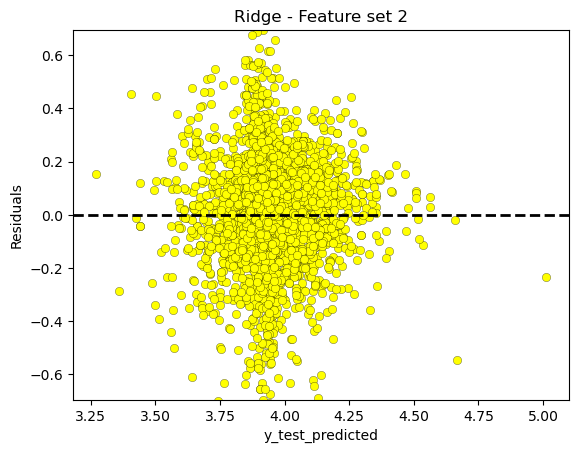

In [259]:
plt.scatter(y_test_predicted_2_ridge, residuals_2_ridge, color="yellow",edgecolors="black", linewidths=0.2)
plt.axline((min(y_test_predicted_2_ridge), 0), slope=0, linewidth=2, color='black', linestyle='--')
plt.title("Ridge - Feature set 2")
plt.xlabel("y_test_predicted")
plt.ylabel("Residuals")
plt.ylim(-max(residuals_2_ridge), max(residuals_2_ridge))
plt.show()

Ordinary least squares <span style="color:blue"> Linear Regression was not appropriate </span> for this set of data since the algorithm would often diverge. Using feature sets 1 and 2 better results were obtained, but slightly different train/test splits could lead to very different error metrics and sometimes divergence.

<span style="color:blue">Random Forest Regressor </span>did not outperform Ridge and <span style="color:blue">requires much more computing time</span>. It was not used with feature sets 6 and 7, since the computation surpassed 1 hour.

<span style="color:blue">The Decision Tree Regressor did not perform well</span>. Calculations using most feature sets led to a R^2 score near zero (or even negative), which means that the model performance was not better than simply assuming the mean as a prediction. Interestingly, predictions improved when the model was provided with only "main_author".

***
***Feature set comparison:***

- [Feature set 1](#1) : **num_pages**, **ratings_count**, **main_author**, **parent_publisher**

- [Feature set 2](#2):  **num_pages**, **ratings_count**, **main_author**

- [Feature set 3](#3):  **num_pages**, **ratings_count**

- [Feature set 4](#4):  **num_pages**, **main_author**

- [Feature set 5](#5):  **ratings_counts**, **main_author**

- [Feature set 6](#6):  **main_author**

- [Feature set 7](#7):  **main_author**, **parent_publisher**


The numeric features <span style="color:blue">number of pages and rating counts are not sufficient</span> to make any prediction, as seen in feature set 3. The <span style="color:blue"> most relevant feature seems to be the author </span> of the book. The Ridge Regressor provided good predicitons using only **main_author**, though different splits between train/test data would results in big changes in error metrics. Predictions with the Ridge Regressor were more consistent when author was combined with numerical features. Combining **main_author** with **num_pages** (set 4), resulted in higher R^2 score than combining **main_author** with **ratings_count** (set 5). It is reasonable that the number of pages has more impact in the ratings than the rating counts since we have seen in that the correlation coefficient is higher. By its turn, the <span style="color:blue">publisher seems to have little impact </span> and increases greatly the number of variables. Therefore, the publisher can be discarded as a feature.

***
**Conclusion:**
The Ridge Regressor was found to be the best algorithm for predicting the average rating of books using the Goodreads dataset. Using the main author as a feature was essential for improving the model. Best and consistent results, with minimal number of features, were obtained using main author, number of pages and ratings count. These predictions had a R^2 score of around 30%. The low R^2 is probably due to the lack of a strong correlation between the ratings and the other variables in the dataset. Low R^2 scores are sometimes expected, especially in problems involving predicting human behaviour, such as rating a book.
***